# Predicting Titanic Survivor using Machine Learning

## 1. Purpose

The primary purpose of this project is to classify whether people survived Titanic tragedy or not using various Machine Learning thecniques.

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095")

## 2. Preparing Data

The dataset is retrieved from https://www.kaggle.com/c/titanic/data?select=train.csv

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Quick Peek at Data

### Run-through on columns

- PassengerId
- Survived: 0 = No / 1 = Yes
- Pclass: Ticket class (1 = First / 2 = Second / 3 = Third)
- Name
- Sex
- Age
- SibSp: Number of siblings & spouses on board
- Parch: Number of parents & children on board
- Ticket: Ticket Number
- Fare
- Cabin: Cabin Number
- Embarked: Port of embarkation

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see there are total 881 rows x 12 columns for train set and 418 rows x 11 columns for test set.

In [5]:
print(train.shape, test.shape)

(891, 12) (418, 11)


### Identifying number of nulls

A lot of nulls are found on Age, Cabin, Embarked columns both train and test.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## A Closer look on Categorical Features

- Pclass
- Sex
- Sibsp
- Parch
- Embarked
- Cabin

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
def get_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar')

The majority of survivors were female and vice versa.

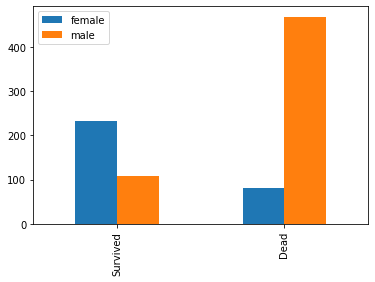

In [12]:
get_chart('Sex')

People from first class were more likely to survive and people from third class were more likley to die.

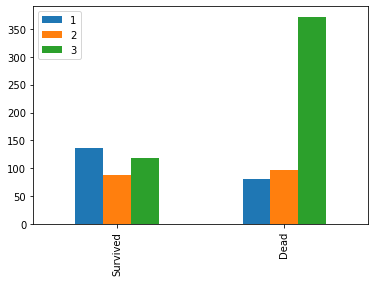

In [13]:
get_chart('Pclass')

Most of the survivors were ones with lesser than one sibling.


However, same could be argued for the dead.

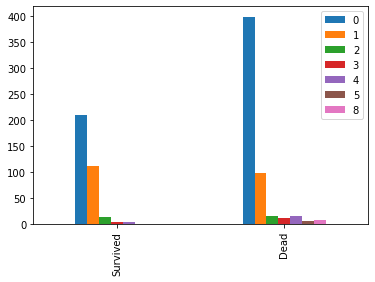

In [14]:
get_chart('SibSp')

The vast majority of people embarked from S.


As such, both the survived and the dead were from S.

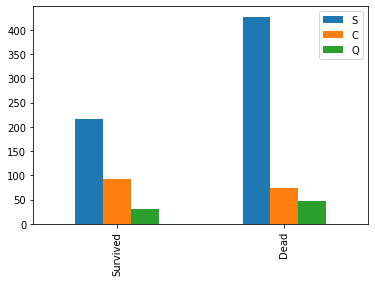

In [15]:
get_chart('Embarked')

## 4. Feature Engineering

### How did Titanic sink and who were more in danger?

According to the image below, the right head hit an iceberg and slowly sinked from right to left. Evidently, people from the right compartment third class were more likley be in danger. However, people from the left compartment third class would be safer. As can be seen, the column Pclass is the key decision factor of survival.

In [16]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

## Merging train & test

Let's conduct feature engineering both on train and test data by merging them into one.

## 4-1. Name

In [17]:
train_test = [train, test] # Combine train & test

for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Sir           1
Ms            1
Countess      1
Don           1
Capt          1
Mme           1
Lady          1
Name: Title, dtype: int64

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [20]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3}

for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [21]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [22]:
train.drop('Name', axis=1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
test.drop('Name', axis=1, inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


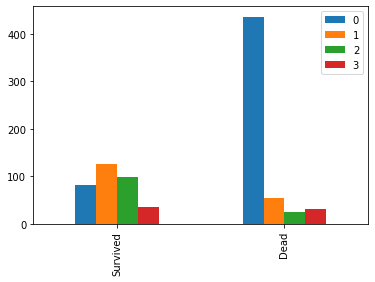

In [24]:
get_chart('Title')

## 4-2. Sex

In [25]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

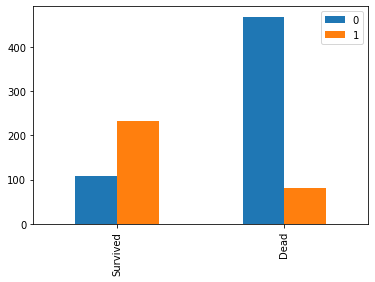

In [26]:
get_chart('Sex')

## 4-4. Age

In [27]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [28]:
train[train["Age"].isna()].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,0,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,1,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,0,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,1,NaN,0,0,330959,7.8792,NaN,Q,1


In [29]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


<AxesSubplot:xlabel='Age', ylabel='Density'>

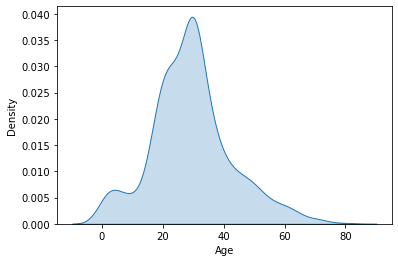

In [31]:
sns.kdeplot(data=train, x = "Age", fill = True)

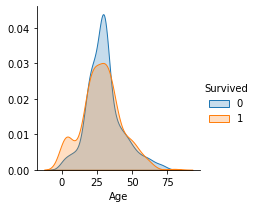

In [32]:
facet = sns.FacetGrid(train, hue = "Survived")
facet.map(sns.kdeplot, 'Age', shade = True)
facet.add_legend()
plt.show()

(0.0, 20.0)

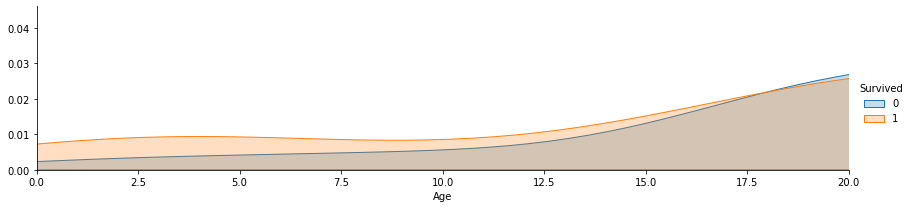

In [33]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

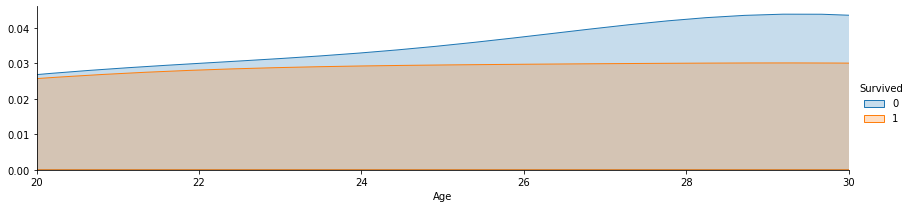

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

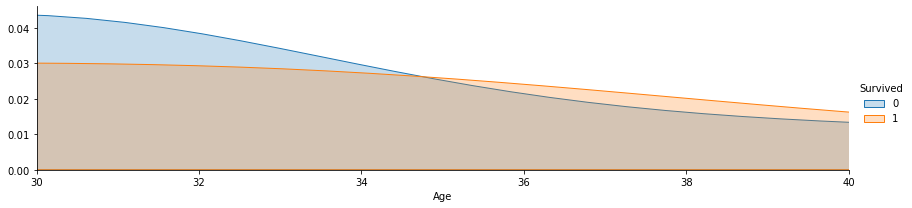

In [35]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

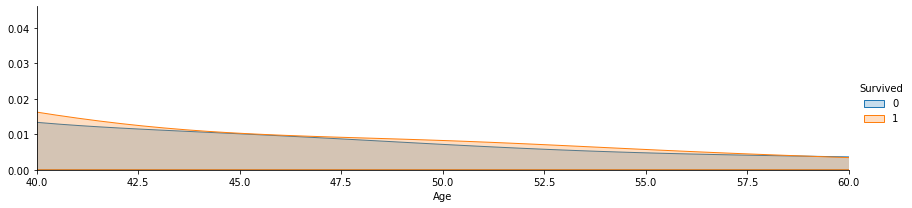

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

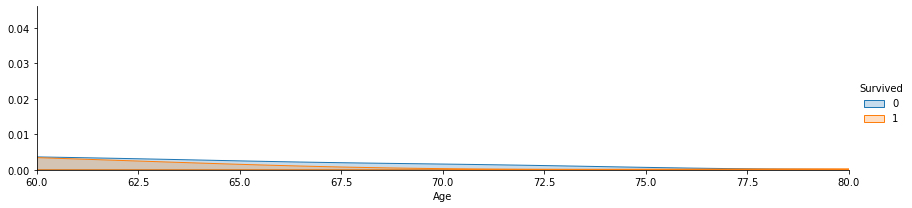

In [37]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

### 4-4-2. Binning

: Converting numerical age to categorical variablr

- child: 0
- young: 1
- adult: 2
- mid-age: 3
- senior: 4

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [41]:
for i in range(len(train)):
    row_age = train.loc[i,"Age"]
    if row_age <= 16:
        train.loc[i,"Age"] = 0
    elif row_age > 16 and row_age <= 26:
        train.loc[i,"Age"] = 1
    elif row_age > 26 and row_age <= 36:
        train.loc[i,"Age"] = 2
    elif row_age > 36 and row_age <= 62:
        train.loc[i,"Age"] = 3
    else:
        train.loc[i,"Age"] = 4
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [43]:
for i in range(len(test)):
    row_age = test.loc[i,"Age"]
    if row_age <= 16:
        test.loc[i,"Age"] = 0
    elif row_age > 16 and row_age <= 26:
        test.loc[i,"Age"] = 1
    elif row_age > 26 and row_age <= 36:
        test.loc[i,"Age"] = 2
    elif row_age > 36 and row_age <= 62:
        test.loc[i,"Age"] = 3
    else:
        test.loc[i,"Age"] = 4
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


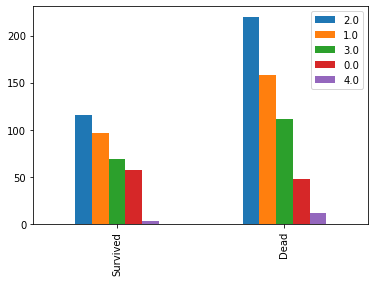

In [44]:
get_chart("Age")

## 4-5. Embarked
### 4-5-1. filling missing values

- Across all classes, the majority of people embarked from S.

<AxesSubplot:>

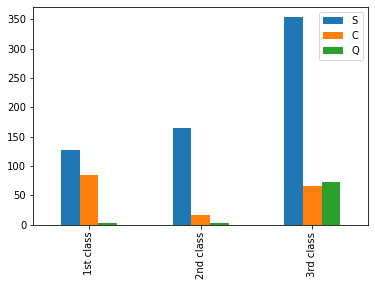

In [45]:
class_1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
class_2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
class_3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([class_1, class_2, class_3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar')

Therefore, it is wise to fill in missing embark values with S.

In [46]:
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [47]:
embark_mapping = {"S" : 0, "C" : 1, "Q" : 2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embark_mapping)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


## 4-6. Fare

- Fill in missing fare values according to the median fare of each calss.

In [49]:
train["Fare"].fillna(train.groupby('Pclass')["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(test.groupby('Pclass')["Fare"].transform("median"), inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [52]:
train[train['Pclass'] == 1]['Fare'].median()

60.287499999999994

In [53]:
train[train['Pclass'] == 2]['Fare'].median()

14.25

In [54]:
train[train['Pclass'] == 3]['Fare'].median()

8.05

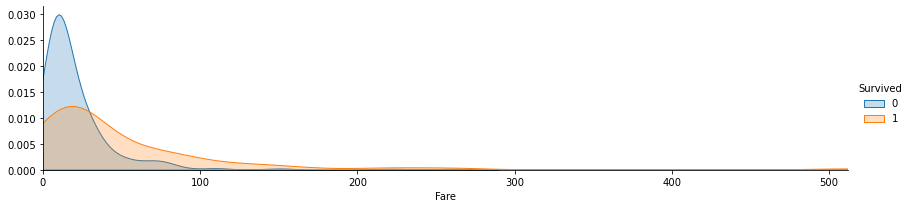

In [57]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

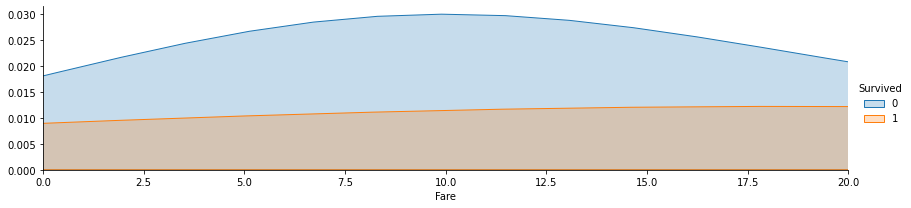

In [58]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(0.0, 30.0)

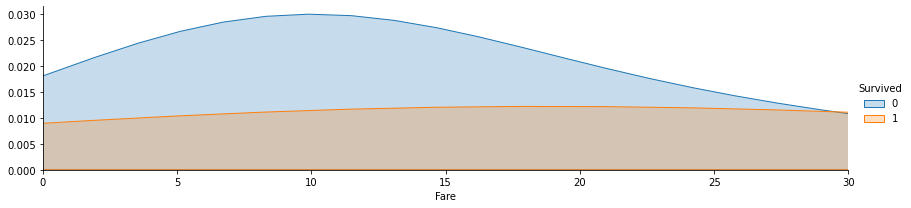

In [59]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

In [61]:
for i in range(len(train)):
    row_fare = train.loc[i,"Fare"]
    if row_fare <= 17:
        train.loc[i,"Fare"] = 0
    elif row_fare > 17 and row_fare <= 30:
        train.loc[i,"Fare"] = 1
    elif row_fare > 30 and row_fare <= 100:
        train.loc[i,"Fare"] = 2
    elif row_fare > 100:
        train.loc[i,"Fare"] = 3
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [62]:
for i in range(len(test)):
    row_fare = test.loc[i,"Fare"]
    if row_fare <= 17:
        test.loc[i,"Fare"] = 0
    elif row_fare > 17 and row_fare <= 30:
        test.loc[i,"Fare"] = 1
    elif row_fare > 30 and row_fare <= 100:
        test.loc[i,"Fare"] = 2
    elif row_fare > 100:
        test.loc[i,"Fare"] = 3
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


## 4-7. Cabin

In [63]:
train["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
C110           1
B73            1
C99            1
B69            1
D19            1
Name: Cabin, Length: 147, dtype: int64

In [65]:
for dataset in train_test:
    dataset["Cabin"] = dataset['Cabin'].str[:1]

<AxesSubplot:>

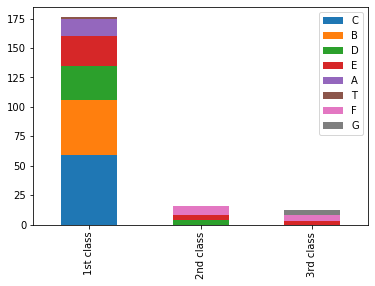

In [67]:
class_1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
class_2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
class_3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([class_1, class_2, class_3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True)

In [68]:
cabin_mapping = {"A" : 0, "B" : 0.4, "C" : 0.8, "D" : 1.2, "E" : 1.6,
                "F" : 2, "G" : 2.4, "T" : 2.8}
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

Let's fill in missing Fare values with median of fare of each Pclass

In [69]:
train['Cabin'].fillna(train.groupby('Pclass')["Cabin"].transform("median"), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')["Cabin"].transform('median'), inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


## 4-8. FamilySize

In [70]:
train['FamilySize'] = train['SibSp'] + train["Parch"] + 1
test['FamilySize'] = test['SibSp'] + train["Parch"] + 1

(0.0, 11.0)

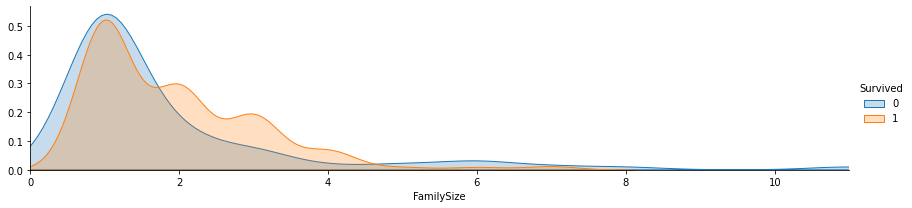

In [72]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim = (0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [73]:
family_mapping = {1 : 0, 2 : 0.4, 3 : 0.8, 4 : 1.2, 5 : 1.6, 6 : 2, 7 : 2.4, 
                 8 : 2.8, 9 : 3.2, 10 : 3.6, 11 : 4}

for dataset in train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [74]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [75]:
features_drop = ['SibSp', 'Ticket', 'Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId'], axis = 1)

In [76]:
X_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']

In [77]:
X_train.shape, y_train.shape

((891, 8), (891,))

In [78]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


## 5. Modelling

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### 5-1. K-Fold Cross Validation

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 5-2. kNN

In [92]:
knn = KNeighborsClassifier(5)
score = cross_val_score(knn, X_train, y_train, cv = k_fold, n_jobs=1)
score

array([0.78888889, 0.83146067, 0.84269663, 0.78651685, 0.86516854,
       0.82022472, 0.82022472, 0.80898876, 0.7752809 , 0.85393258])

In [93]:
round(np.mean(score),3)

0.819

## 5-3. Decision Tree

In [94]:
dt = DecisionTreeClassifier()
score = cross_val_score(dt, X_train, y_train, cv = k_fold, n_jobs = 1)
score

array([0.76666667, 0.80898876, 0.76404494, 0.7752809 , 0.88764045,
       0.76404494, 0.83146067, 0.82022472, 0.74157303, 0.78651685])

In [95]:
round(np.mean(score), 3)

0.795

## 5-4. Random Forest

In [96]:
rf = RandomForestClassifier(n_estimators = 50)
score = cross_val_score(rf, X_train, y_train, cv = k_fold, n_jobs = 1)
score

array([0.82222222, 0.84269663, 0.80898876, 0.7752809 , 0.87640449,
       0.82022472, 0.82022472, 0.80898876, 0.76404494, 0.82022472])

In [97]:
round(np.mean(score), 3)

0.816

## 5-5. Naive Bayes

In [98]:
nb = GaussianNB()
score = cross_val_score(nb, X_train, y_train, cv = k_fold, n_jobs = 1)
score

array([0.85555556, 0.73033708, 0.75280899, 0.75280899, 0.70786517,
       0.80898876, 0.76404494, 0.80898876, 0.86516854, 0.83146067])

In [99]:
round(np.mean(score), 3)

0.788

## 5-6. SVM

In [100]:
svm = SVC()
score = cross_val_score(svm, X_train, y_train, cv = k_fold, n_jobs = 1)
score

array([0.83333333, 0.79775281, 0.83146067, 0.82022472, 0.84269663,
       0.82022472, 0.84269663, 0.85393258, 0.84269663, 0.86516854])

In [101]:
round(np.mean(score), 3)

0.835

Support Vector Machine predicts 83.5% of survivors.